In [32]:
import asammdf
import numpy as np
import py
import get_files

In [33]:
def _path(self):
    return py.path.local(self._file.name)

def __repr__(self):
    return "MDF<{}, v={}>".format(self._path.basename, self.version)

extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

In [34]:
buffer_time = 5 # seconds

In [35]:
t0=np.arange(0, buffer_time, 1e-3, dtype=np.float32)

In [36]:
def sine(t, A=1, f=1):
    sine_ = A*np.sin(
        2 * np.pi * f * t
    )
    return sine_

In [37]:
Signal = asammdf.Signal

In [38]:
signals = list()

signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)

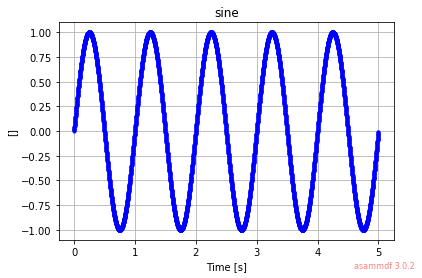

In [39]:
signal0.plot()

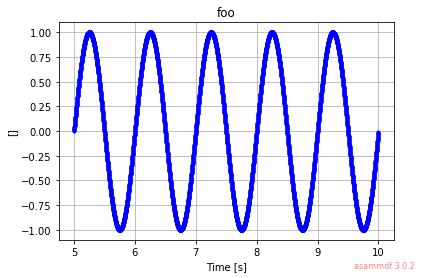

In [40]:
signal1.plot()

In [41]:
signals = [signal0]

In [42]:
mdf = MDF2(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst="log_data",
    overwrite=True,
    compression=2,
)
print(o)

log_data.mf4


In [43]:
t1=np.arange(buffer_time, 2*buffer_time, 1e-3, dtype=np.float32)

In [44]:
def flush(self=None):
    pass

In [46]:
signal1 = Signal(
    samples=sine(t1),
    timestamps=t1,
    name="foo"
)

In [47]:
signal0

Signal(name=sine, samples=array([ 0.        ,  0.00628314,  0.01256604, ..., -0.01884595,
       -0.01256393, -0.00628141], dtype=float32), timestamps=array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00], dtype=float32), unit=, conversion=None, comment=, raw=False)

In [48]:
signal1

Signal(name=foo, samples=array([ 1.35106495e-06,  6.28411630e-03,  1.25666335e-02, ...,
       -2.11253352e-02, -1.48397405e-02, -8.55355989e-03], dtype=float32), timestamps=array([5.      , 5.001   , 5.002   , ..., 9.996637, 9.997638, 9.998638],
      dtype=float32), unit=, conversion=None, comment=, raw=False)

In [50]:
signal0.extend(signal1).name

'sine'

In [52]:
signal0.timestamps[-1]

4.999

In [53]:
signal1.timestamps[0]

5.0

In [54]:
signal1.timestamps[-1]

9.998638

In [66]:
np.zeros([1, 100])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [ ]:

        self.index=0

In [87]:
import uuid

In [107]:
class SignalBuffer():
    def __init__(self, buffer=100):
        self.buffer = buffer
        self.index=0
        self.uuid=uuid.uuid4()
        self.timestamps=np.zeros([self.buffer])
        self.samples=np.zeros(self.buffer])
        
    def append(self, timestamp, sample):
        try:
            self.timestamps[self.index] = timestamp
            self.samples[self.index] = sample
            self.index+=1
        except:
            raise
        
    @property
    def _free(self):
        return self.buffer-self.index
        
    def __repr__(self):
        return "SignalBuffer<free={}>".format(self._free)

In [113]:
x = SignalBuffer()

In [114]:
t1=np.arange(buffer_time, 2*buffer_time, 1e-3, dtype=np.float32)

In [116]:
x.timestamps[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
for t in t1:
    x.append(t, sine(t))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [102]:
timestamp

NameError: name 'timestamp' is not defined